In [59]:
#Run the function with 40 days, N_0=12, M_0=5, t=40, kN=400, kM=1600, r_N=1.2, r_M=1.2, AlphaNM=0.5, AlphaMN=0.5, Nt=N_0*t, Mt=M_0*t. With Initial populations of N_0=12 and M_0=5
# Fix function logic and print results

def NandM_population(N_0, M_0, t, kN, kM, r_N, r_M, AlphaNM, AlphaMN):
    # Interspecific competition growth model
    # Save N_values into a list
    N_Values = [N_0]
    M_Values = [M_0]
    # Save initial population
    #Set current population size 
    current_N = N_0
    current_M = M_0
    for i in range(t):
        if i == 14:
            current_M = current_M + 200
            #calculate new population after perturbation
        # Calculate new population sizes using the Lotka-Volterra competition equations
        #N_0+1 = N_0 + r_N * N_0 * (1-(N_0 + AlphaNM * M_0)/kN)
        #M_0+1 = M_0 + r_M * M_0 * (1-(M_0 + AlphaMN * N_0)/kM)
        current_N = current_N + r_N * current_N * (1 - ((current_N + AlphaNM * current_M) / kN)) 
        current_M= current_M + r_M * current_M * (1 - ((current_M + AlphaMN * current_N) / kM)) 
        # Round to three decimal places
        N_Values.append(current_N)
        M_Values.append(current_M)  
    return N_Values, M_Values
N_Values, M_Values = NandM_population(N_0=12, M_0=5, t=35, kN=400, kM=500, r_N=1.2, r_M=1.2, AlphaNM=0.9, AlphaMN=0.9)
# Print the results of the equations for each time step
for i in range(len(N_Values)):
    print(f"Day {i}: N = {N_Values[i]}, M = {M_Values[i]}")

    Current_M = M_Values[-1]
    print(f"Current_M (final population of M): {Current_M}")  
   

    
    
    

Day 0: N = 12, M = 5
Current_M (final population of M): 499.2081739001423
Day 1: N = 25.805999999999997, M = 10.6612952
Current_M (final population of M): 499.2081739001423
Day 2: N = 54.03251255538575, M = 21.937775538998842
Current_M (final population of M): 499.2081739001423
Day 3: N = 106.91253692563478, M = 42.041953603618936
Current_M (final population of M): 499.2081739001423
Day 4: N = 188.78071740467448, M = 71.10694190646835
Current_M (final population of M): 499.2081739001423
Day 5: N = 272.159327833813, M = 102.49917711539668
Current_M (final population of M): 499.2081739001423
Day 6: N = 301.21893275596756, M = 133.5942581950927
Current_M (final population of M): 499.2081739001423
Day 7: N = 281.8320920463986, M = 169.74706362610993
Current_M (final population of M): 499.2081739001423
Day 8: N = 252.57415901703268, M = 211.68254333768698
Current_M (final population of M): 499.2081739001423
Day 9: N = 219.9250734503102, M = 257.60151176747434
Current_M (final population of 

In [60]:
for i in range(30): 
    if i == 9:
     print (i+1)


10


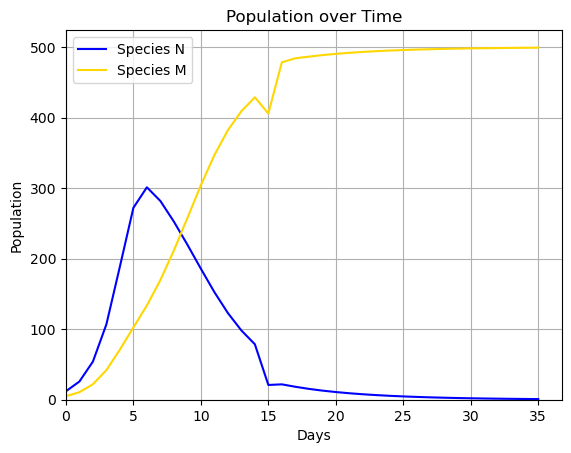

In [61]:
#plot the population data with "Days" on the x-axis and "Population" on the y-axis
import matplotlib.pyplot as plt
plt.plot(N_Values, label='Species N', color='blue')
plt.plot(M_Values, label='Species M', color='gold')
plt.xlabel("Days")
plt.ylabel("Population")
plt.title("Population over Time")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.grid()
plt.show()

After the pertubation of an immigration of 50 individuals into species M population, both species were impacted - Species M increased, species N decreased - but they stabilised and returned to equilibrium.
After the pertubation of an immigration of 200 individuals into species M population, both species were impacted - Species M increased, species N decreased - but they stabilised and returned to equilibrium.

After the changing alpha values to 0.9 for both species from 0.5, the Species N population increased until day 6, then rapidly decreased as species M population continued to increase until it plateaued at its carrying capacity 500. Species N then decreased until its population hit 0. at day 15, the population of M saw increase of 200 as an immigration occured. The increase of M continued increasing until carrying capacity and population N experienced a sudden drop in population, then a slow decline until population of 0. 


In [62]:

def NandM_population(N_0, M_0, t, kN, kM, sN, sM, dN, dM):
    # Interspecific competition growth model
    # Save N_values into a list
    N_Values = [N_0]
    M_Values = [M_0]
    # Save initial population
    #Set current population size 
    current_N = N_0
    current_M = M_0
    for i in range(t):
        if i == 4: 
            current_M = current_M + 100
            #calculate new population after perturbation
        current_N = current_N + sN * current_N * (1 - current_N / kN - current_M / kM) - dN * current_N
        current_M= current_M + sM * current_M * (1 - current_M / kM - current_N / kN) - dM * current_M
        # Round to three decimal places
        N_Values.append(current_N)
        M_Values.append(current_M)  
    return N_Values, M_Values
N_Values, M_Values = NandM_population(N_0=12, M_0=5, t=40, kN=400, kM=1600, sN=1, sM=1, dN=0.4, dM=0.6)

# For coexistence in Lotka-Volterra competition, both species must limit themselves more than they limit each other:
# AlphaMN < kM / kN and AlphaNM < kN / kM
kM = 1600
kN = 400
AlphaMN = kN / kM
AlphaNM = kM / kN
print("For coexistence:")
print(f"AlphaMN < kM / kN = {kM / kN}  (currently AlphaMN = {AlphaMN})")
print(f"AlphaNM < kN / kM = {kN / kM}  (currently AlphaNM = {AlphaNM})")

if AlphaMN < kM / kN and AlphaNM < kN / kM:
    print("Both populations can coexist.")
else:
    print("Coexistence is not possible with current alpha values.")


For coexistence:
AlphaMN < kM / kN = 4.0  (currently AlphaMN = 0.25)
AlphaNM < kN / kM = 0.25  (currently AlphaNM = 4.0)
Coexistence is not possible with current alpha values.


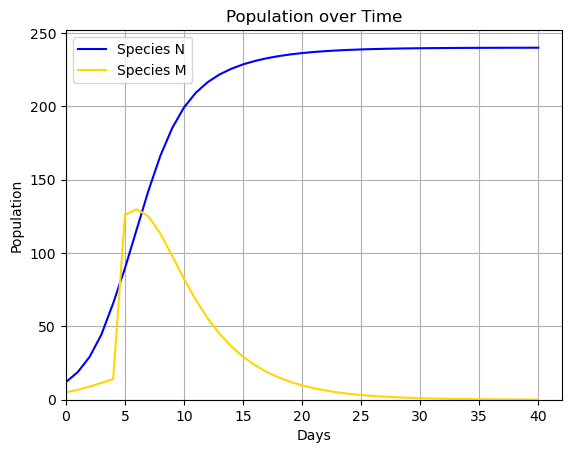

In [63]:
#plot the population data with "Days" on the x-axis and "Population" on the y-axis
import matplotlib.pyplot as plt
plt.plot(N_Values, label='Species N', color='blue')
plt.plot(M_Values, label='Species M', color='gold')
plt.xlabel("Days")
plt.ylabel("Population")
plt.title("Population over Time")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.grid()
if i == 4:
    Current_M += 100
plt.show()